In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import country_converter as coco


In [13]:
file_path_inter = "Resources/chinese debt trap all over the world.csv"
file_path_africa = "Resources/chinese debt trap in Africa.csv"
debt_inter = pd.read_csv(file_path_inter)
debt_africa = pd.read_csv(file_path_africa)


In [10]:
debt_inter.head()


,Expand All | Collapse All,YEAR,AMOUNT,LENDER,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country
0,"“Lar Patriota"" Infrastructure (Phase 1)",2011,50000000,CDB,Government,Transport,None Known,Angola
1,"10-Year Oil Supply Plan (10Mt/Year), ""Oil for ...",2009,7000000000,CDB,Petrobras,"Extraction, pipelines",None Known,Brazil
2,1000 housing project,2012,47000000,ExImBank,Government,Government,None Known,Suriname
3,115kV Transmission Line and Substation from Ph...,2009,475000000,ExImBank,Electricite Du Cambodge,Power,None Known,Cambodia
4,151 Multisector infrastructure projects,2016,600000000,CDB,Central Bank of Kenya,Mulit-sector/discretionary,None Known,Kenya


In [6]:
debt_africa.head()


,S.no,Project,Year,Lender,$ Allocation,Country,Invested On
0,1,"Luanda Railway Phase I Rehabilitation, 444km (...",2002,CHEXIM,$90M,Angola,Transportation
1,2,"Kipsigak-Serem-Shamakhokho Road, 54km, Loan 2",2001,CIDCA,$6M,Kenya,Transportation
2,3,"Addis-Adama Expressway Phase I, 80km",2009,CHEXIM,$349M,Ethiopia,Transportation
3,4,"Railway Modernisation Project 1 (Idu-Kaduna), ...",2010,CHEXIM,$500M,Nigeria,Transportation
4,5,Special Train Loan - TAZARA,2001,CIDCA,$6M,Zambia,Transportation


In [88]:
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

In [89]:
worldmap.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [93]:
#define a function to convert country names to country code to match with worldmap
def co_coverter(x):
    try:
        x = coco.convert(x)
    except:
        x = None
    return x

In [95]:
debt_inter["iso_a3"] = debt_inter["Country"].apply(co_coverter)
debt_africa["iso_a3"] = debt_africa["Country"].apply(co_coverter)

Regional not found in regex
Regional not found in regex
Regional not found in regex
Regional not found in regex
Regional not found in regex
Regional not found in regex
Regional not found in regex
Regional not found in regex
Regional not found in regex
Regional not found in regex
Regional not found in regex
Regional not found in regex
Regional not found in regex
Regional not found in regex
Regional not found in regex
Regional not found in regex
Regional not found in regex
Regional not found in regex
Regional not found in regex
Regional not found in regex
Regional not found in regex
Regional not found in regex
Regional not found in regex
Regional not found in regex
Regional not found in regex
Regional not found in regex
Regional not found in regex
Regional not found in regex
Regional not found in regex
Regional not found in regex
Regional not found in regex
Regional not found in regex


In [96]:
debt_inter.head()

,Expand All | Collapse All,YEAR,AMOUNT,LENDER,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country,iso_a3
0,"“Lar Patriota"" Infrastructure (Phase 1)",2011,50000000,CDB,Government,Transport,None Known,Angola,AGO
1,"10-Year Oil Supply Plan (10Mt/Year), ""Oil for ...",2009,7000000000,CDB,Petrobras,"Extraction, pipelines",None Known,Brazil,BRA
2,1000 housing project,2012,47000000,ExImBank,Government,Government,None Known,Suriname,SUR
3,115kV Transmission Line and Substation from Ph...,2009,475000000,ExImBank,Electricite Du Cambodge,Power,None Known,Cambodia,KHM
4,151 Multisector infrastructure projects,2016,600000000,CDB,Central Bank of Kenya,Mulit-sector/discretionary,None Known,Kenya,KEN


In [97]:
debt_africa.head()

,S.no,Project,Year,Lender,$ Allocation,Country,Invested On,iso_a3
0,1,"Luanda Railway Phase I Rehabilitation, 444km (...",2002,CHEXIM,90000000,Angola,Transportation,AGO
1,2,"Kipsigak-Serem-Shamakhokho Road, 54km, Loan 2",2001,CIDCA,6000000,Kenya,Transportation,KEN
2,3,"Addis-Adama Expressway Phase I, 80km",2009,CHEXIM,349000000,Ethiopia,Transportation,ETH
3,4,"Railway Modernisation Project 1 (Idu-Kaduna), ...",2010,CHEXIM,500000000,Nigeria,Transportation,NGA
4,5,Special Train Loan - TAZARA,2001,CIDCA,6000000,Zambia,Transportation,ZMB


In [32]:
debt_africa["Invested On"].unique()

array(['Transportation', 'Power', 'Mining', 'ICT', 'Water',
       'Other social', 'Multisector', 'Industry', 'Defense', 'Government',
       'Banking', 'Unallocated', 'Agriculture', 'Budget', 'Education',
       'Business', 'Health', 'Trade', 'Other commodity', 'Food',
       'Environment'], dtype=object)

In [26]:
multiplier = {"K": 1000, "M": 1000000, "B": 1000000000}
def clear_string(amount):
    amount = amount.strip("$").replace(",","")
    if amount[-1].isdigit():
        return int(amount)
    else:
        return int(float(amount[:-1])*  multiplier[amount[-1]])



In [14]:
debt_inter["AMOUNT"] = debt_inter["AMOUNT"].apply(clear_string)



In [28]:
debt_africa["$ Allocation"] = debt_africa["$ Allocation"].apply(clear_string)


Text(0, 0.5, 'Amount')

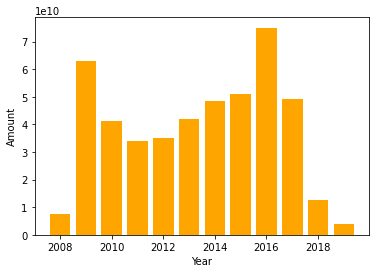

In [29]:
debt_inter_year = debt_inter.groupby("YEAR", as_index = False)["AMOUNT"].sum()
debt_inter_year
plt.bar(debt_inter_year["YEAR"], debt_inter_year["AMOUNT"], color = "orange", align = "center")
plt.xlabel("Year")
plt.ylabel("Amount")

In [42]:
debt_inter["SECTOR"] = debt_inter["SECTOR"].str.replace("fTransport", "Transport")

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, 

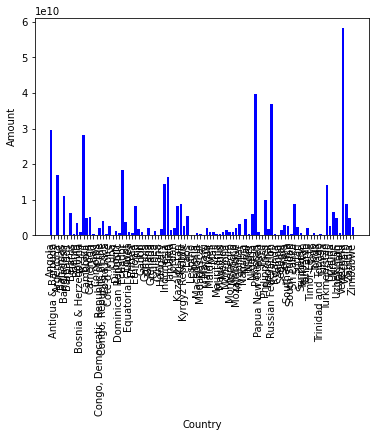

In [30]:
debt_inter_country = debt_inter.groupby("Country", as_index = False)["AMOUNT"].sum()
debt_inter_country.head()
plt.bar(debt_inter_country["Country"], debt_inter_country["AMOUNT"], color = "blue", align = "center")
plt.xlabel("Country")
plt.ylabel("Amount")
plt.xticks(rotation = 90)

In [31]:
#Each year's highest lending amount and country
debt_inter_rank = debt_inter.sort_values(by=["YEAR","AMOUNT"], ascending=False)
debt_inter_rank = debt_inter_rank.drop_duplicates(subset=["YEAR"])
debt_inter_rank


,Expand All | Collapse All,YEAR,AMOUNT,LENDER,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country
451,Mabini LNG hub,2019,2000000000,CDB,Philippine National Oil Company,Power,None Known,Philippines
694,San Martin freight railway upgrading,2018,1100000000,ExImBank,Government,Transport,Within Indigenous Peoples' Lands\n Within Crit...,Argentina
277,Expansion And Reconstruction Of Existing Line ...,2017,6100000000,ExImBank,Ministry of Railways,Transport,Within Indigenous Peoples' Lands\n Within Crit...,Pakistan
175,Credit Line for Infrastructure Projects,2016,15000000000,CDB,Government,Other construction,None Known,Iran
337,"Healthcare, education, and transportation proj...",2015,5300000000,ExImBank,Government,Mulit-sector/discretionary,None Known,Ecuador
381,Karachi Nuclear Power Complex (K-2/K-3),2014,6500000000,ExImBank,Government,Power,Within Critical Habitats,Pakistan
213,Discretionary,2013,5000000000,CDB,Government,Mulit-sector/discretionary,None Known,Venezuela
212,Discretionary,2012,4000000000,CDB,Government,Mulit-sector/discretionary,None Known,Venezuela
362,Ioujno-Elotenshoie Gas Field (Extension of the...,2011,4099999999,CDB,Turkmengaz,"Extraction, pipelines",None Known,Turkmenistan
298,"Freeway, power plant, heavy industry, housing ...",2010,14300000000,CDB,Government,Mulit-sector/discretionary,None Known,Venezuela


In [33]:
# Each year's highest lending amount in Africa
debt_africa_rank = debt_africa.sort_values(by=["Year","$ Allocation"], ascending=False)
debt_africa_rank = debt_africa_rank.drop_duplicates(subset=["Year"])
debt_africa_rank

,S.no,Project,Year,Lender,$ Allocation,Country,Invested On
610,611,"Oil Roads - Lots 1,2 & 3",2020,CHEXIM,456000000,Uganda,Transportation
196,197,New Cairo City Central Business District,2019,"MixedCN: CHEXIM, Industrial and Commercial Ban...",2500000000,Egypt,Government
506,507,Kusile Power Station and other Eskom Infrastru...,2018,CDB,1400000000,South Africa,Power
1005,1006,Multisector,2017,CDB,2200000000,Angola,Multisector
713,714,Sonangol Recapitalization,2016,CDB,10000000000,Angola,Mining
854,855,"SGR Phase II Nairobi to Malaba - Sub-phase 1, ...",2015,CHEXIM,1500000000,Kenya,Transportation
633,634,Sonangol Development,2014,CDB,2000000000,Angola,Mining
522,523,Sonangol Development,2013,CDB,2500000000,Angola,Mining
894,895,"National Route 1, Pointe-Noire-Brazzaville Roa...",2012,CHEXIM,1200000000,Republic of Congo,Transportation
75,76,Sonangol Development,2011,CDB,2000000000,Angola,Mining


In [36]:
# Compare lending amount internationally and in Africa

total_rank = pd.merge(debt_africa_rank, debt_inter_rank, left_on="Year", right_on="YEAR")
total_rank = total_rank[["Year", "Country_x", "AMOUNT", "Country_y", "$ Allocation"]]
total_rank["Africa/International"] = total_rank["$ Allocation"]/total_rank["AMOUNT"]
total_rank

,Year,Country_x,AMOUNT,Country_y,$ Allocation,Africa/International
0,2019,Egypt,2000000000,Philippines,2500000000,1.250000
1,2018,South Africa,1100000000,Argentina,1400000000,1.272727
2,2017,Angola,6100000000,Pakistan,2200000000,0.360656
3,2016,Angola,15000000000,Iran,10000000000,0.666667
4,2015,Kenya,5300000000,Ecuador,1500000000,0.283019
5,2014,Angola,6500000000,Pakistan,2000000000,0.307692
6,2013,Angola,5000000000,Venezuela,2500000000,0.500000
7,2012,Republic of Congo,4000000000,Venezuela,1200000000,0.300000
8,2011,Angola,4099999999,Turkmenistan,2000000000,0.487805
9,2010,Angola,14300000000,Venezuela,2500000000,0.174825


In [47]:
# Country loans total

debt_country = debt_inter.groupby("Country", as_index = False)["AMOUNT"].sum().sort_values(by="AMOUNT", ascending=False)
debt_country

,Country,AMOUNT
90,Venezuela,58191000000
63,Pakistan,39853000000
68,Russian Federation,37045000000
0,Angola,29640000000
10,Brazil,28156000000
...,...,...
80,Timor-Leste,50000000
44,Liberia,50000000
65,Peru,50000000
14,Comoros,32000000


In [53]:
#Change in different investment in different years in Venezuela (borrow the most in years)
venezuela_inv = debt_inter.loc[debt_inter["Country"] == "Venezuela", ["YEAR", "AMOUNT", "SECTOR"]]
venezuela_inv = venezuela_inv.groupby(["YEAR","SECTOR"], as_index=False)["AMOUNT"].sum()
venezuela_inv

,YEAR,SECTOR,AMOUNT
0,2009,"Extraction, pipelines",5000000000
1,2009,Mulit-sector/discretionary,500000000
2,2010,Manufacturing,1100000000
3,2010,Mulit-sector/discretionary,20300000000
4,2011,"Extraction, pipelines",4000000000
5,2012,Mulit-sector/discretionary,4000000000
6,2012,Power,500000000
7,2013,"Extraction, pipelines",6200000000
8,2013,Mulit-sector/discretionary,5000000000
9,2013,Transport,391000000


In [38]:
# Sector invested worldwide over the years
Sector_investing = debt_inter.groupby("SECTOR", as_index = False)["AMOUNT"].sum()
Sector_investing

,SECTOR,AMOUNT
0,"Agriculture, food",7526000000
1,"Extraction, pipelines",114186999998
2,Government,23120000000
3,Manufacturing,8747000000
4,Mulit-sector/discretionary,59656000000
5,Other construction,22613000000
6,Power,98534000000
7,Telecom,8061000000
8,Transport,120118000000
9,fTransport,85000000


In [43]:
#Sector invested by Year
sector_yearly = debt_inter.groupby(["SECTOR","YEAR"], as_index=False)["AMOUNT"].sum()
sector_yearly

,SECTOR,YEAR,AMOUNT
0,"Agriculture, food",2008,29000000
1,"Agriculture, food",2009,30000000
2,"Agriculture, food",2011,487000000
3,"Agriculture, food",2012,3579000000
4,"Agriculture, food",2013,745000000
...,...,...,...
85,Transport,2015,14006000000
86,Transport,2016,21679000000
87,Transport,2017,16837000000
88,Transport,2018,4149000000


Text(0.5, 1.0, 'Agriculture Investment Over the Years')

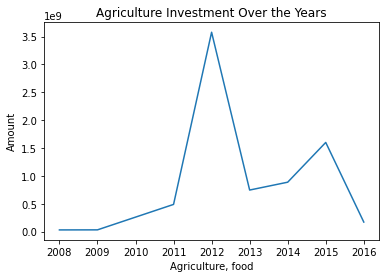

In [45]:
#Plot line graph for each sector's investment change over years
sector_agri = sector_yearly.loc[sector_yearly["SECTOR"] == "Agriculture, food"]
plt.plot(sector_agri["YEAR"], sector_agri["AMOUNT"])
plt.xlabel("Agriculture, food")
plt.ylabel("Amount")
plt.title("Agriculture Investment Over the Years")

In [46]:
debt_inter.SECTOR.unique()

array(['Transport', 'Extraction, pipelines', 'Government', 'Power',
       'Mulit-sector/discretionary', 'Telecom', 'Other construction',
       'Agriculture, food', 'Manufacturing'], dtype=object)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

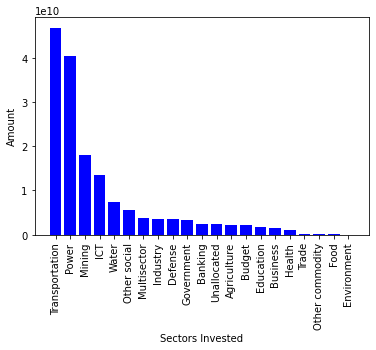

In [59]:
# Sector investment ranking in Africa
debt_africa_sector = debt_africa.groupby("Invested On", as_index=False)["$ Allocation"].sum().sort_values(
    by="$ Allocation", ascending = False)
plt.bar(debt_africa_sector["Invested On"], debt_africa_sector["$ Allocation"], color="blue")
plt.xlabel("Sectors Invested")
plt.ylabel("Amount")
plt.xticks(rotation = 90)

In [74]:
# Compare Invesment Sector between international and Africa over the years
debt_africa_years = debt_africa.groupby(["Year","Invested On"], as_index=False)["$ Allocation"].sum().sort_values(
    by = "$ Allocation", ascending = False)
debt_africa_years = debt_africa_years.drop_duplicates(subset = ["Year"])
debt_inter_years = debt_inter.groupby(["YEAR","SECTOR"], as_index=False)["AMOUNT"].sum().sort_values(
    by = "AMOUNT", ascending = False)
debt_inter_years = debt_inter_years.drop_duplicates(subset = ["YEAR"])
debt_in_afr = pd.merge(debt_inter_years, debt_africa_years, left_on="YEAR", right_on="Year", how="outer").sort_values(by="Year")
print(debt_inter_years)
debt_in_afr



    YEAR                      SECTOR       AMOUNT
10  2009       Extraction, pipelines  43060000000
56  2014                   Transport  22612000000
73  2016                   Transport  21679000000
20  2010  Mulit-sector/discretionary  20360000000
81  2017                   Transport  16837000000
42  2013       Extraction, pipelines  14649999999
26  2011       Extraction, pipelines  14202999999
65  2015                   Transport  14006000000
38  2012                       Power   9620000000
84  2018                       Power   4342000000
88  2019                       Power   3400000000
6   2008                       Power   3398000000


,YEAR,SECTOR,AMOUNT,Year,Invested On,$ Allocation
20,NaN,NaN,NaN,2000,Industry,52000000
19,NaN,NaN,NaN,2001,Power,128000000
18,NaN,NaN,NaN,2002,Power,324000000
13,NaN,NaN,NaN,2003,Power,1286000000
17,NaN,NaN,NaN,2004,Transportation,424000000
15,NaN,NaN,NaN,2005,Power,837000000
12,NaN,NaN,NaN,2006,ICT,2766000000
14,NaN,NaN,NaN,2007,Transportation,1232000000
11,2008.0,Power,3.398000e+09,2008,Power,904000000
0,2009.0,"Extraction, pipelines",4.306000e+10,2009,Transportation,2205000000
